# Python Lab: Week 5

This week we are going to work with a larger piece of code that was presented in the last lecture. 
We will first make some additions to the sample code we have developed in the lecture and then we will implement an alternative algorithm. 

The lab assumes you are using `Spyder 3` and Python 3.x
You should have attended Lecture 5 in the Python series and read the lecture notes before attempting this lab.

Let us recall the TSP problem presented in the lecture:

“A salesperson is presented each day with a list of cities. The distance between them is calculated as a Euclidean distance. She needs to visit all of them exactly once and then return to the starting point. 
Write an algorithm that generates a tour with an acceptable travel distance.”

An instance of this problem consists of the coordinates (x, y) of a number of cities and a solution is a tour: the order in which these cities are visited before returning to the starting point. The images below show an instance and a tour:

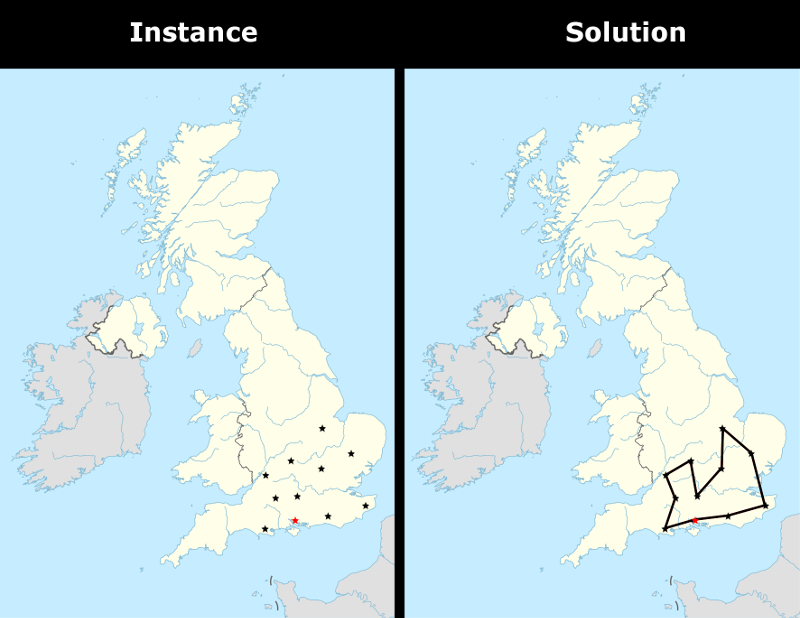

Find the `lab5_tsp_template.py` file on blackboard, save it to your PC and open it on Spyder. This is the sample code
 that we have done in Lecture 5. **Reach for the slides of Lecture 5 on Blackboard if you need clarification in any bits of it, or if you do not remember how the nearest neighbour algorithm works**. 
 
 Make sure that you also have the file `cities.csv` in the same directory as the Python file. If you run it, the following output should appear:

`[0 1 3 7 5 4 2 6]`

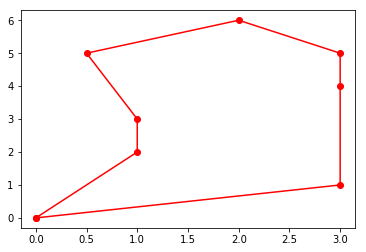

Also, the functions in the file have been stored in memory. 
This means that we can access them from the interactive console on the right side of Spyder.
For example, we can calculate the distance of two points (0,2) and (3, 4) by typing the following:
`euclidean_distance(0, 2, 3, 4)`
Which outputs:
```
3.605551275463989
```

The file that we have been using for testing so far might be a bit too simple.
Find from Blackboard the file `more_cities.csv` and place it in the same directory.
This file contains 50 cities, making the problem a bit more challenging.

Let us run this file. To do this, go to the `main()` function and change the value of the variable `csvfile` to `'more_cities.csv'`.
When you run the file again, the output should be as follows:
```
[ 0 47 38 41 23  5 21 40 44  3 19 32 27 49 13 36 10 17  1  7 20 12 46 37
  4 35  9 48 26 28 34  2  8 15 43 25 24 29 31 30 14 11 45 22 18 39  6 16
 42 33]```
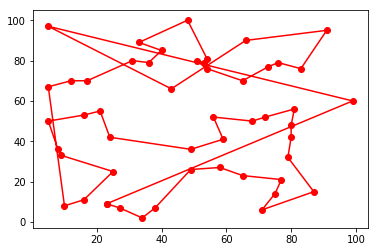

This solution no longer looks very good!

To assess the quality of the solution, we should measure the travel distance it entails. 
It makes sense to have one function to calculate it.

## Exercise 1: Tour length
Write a function that calculates the length of the tour, called `calculate_tour_length`. 
The function should take as arguments a tour and a list of city coordinates. 
Once it is completed, call it from the main function (after the algorithm runs) and print it's output.
You should add these two lines to the main function: 

```python
    tour_length = calculate_tour_length(city_order, cities)
    print('Tour length: {0}'.format(tour_length))
```

It is difficult to know if you have coded the right function using the instance `more_cities.csv`.
Instead, test your function in something easier to understand.
### Exercise 1b:
Create a new instance to test your function. The instance will be a simple square, as the image below:

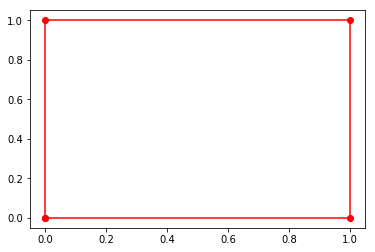


**Tasks:**

* Create a CSV file called `square.csv`. This can be done either in the Notepad or in Excel.

    * If you choose Notepad, enter the values in each row separated by commas, and when you save the file make sure you select in file type `All files` and name your file `square.csv`
    * If you choose Excel, you can just enter the values in the cells, but make sure you save the file as Comma Separated Value (CSV), **not as the default Excel file, .xlsx**.

    * **Tip:** Whatever method you choose, remember, the file needs to have a header: `x_coord` for the first column and `y_coord` for the second.

* Your file should contain four cities, the coordinates of the corners of the square

* Run the code using your newly created file. It should output the image above. Since the tour is going through four sides of size 1, the tour length should be `4.0`.


When working on large files, it is very likely that we will want to save the output to a file rather than printing it on screen. To do that, we can use the handy Numpy function `np.savetxt`.
The basic syntax is as follows:
```python
np.savetxt('filename.csv', array_to_save, delimiter=',')
```

If you want to add headers, you can do so using these two keyword arguments: `header="header_text"` and `comments=''`. If you are saving an array with more than one column, the headers should be separated by commas, e.g.: `header="header_1,header_2,header_3"`

## Exercise 2: Save CSV
Write a function called `save_tour_to_csv` that takes two arguments, `filename` and `tour`.
It should save the contents of the `tour` variable in a file called `filename.`.

Once ready, call it at the end of your `main()` function, adding these lines:

```
output_file = 'output.csv'
save_tour_to_csv(output_file, city_order)
```

Now, when you run your code, a new file will be created containing the tour your algorithm has found. 


**Tip:** If you run your code twice, the file `output.csv` will be replaced with the new contents. If you have the old `output.csv` open in Excel when you run your code, Python will throw an error: Access denied.

**Tip:** Test this function. The contents of the file should match the output on screen of `print(tour)`

## Exercise 3: Random start
Given that the performance of nearest neighbour was not very good with the file `more_cities.csv`, we are wondering if choosing a different start city might change the output of the algorithm.
**Task:** Modify the `nearest_neighbour` function so that the first added city is not the first one in the file (city `0`, but a random one. Use `np.random.randint` to generate a random city.

The behaviour should now be different in each run. Do you see any difference? Why does this change alter the behaviour of the algorithm?

**Tip:** To help you understand what is going on, it might help you set the starting city to known values (e.g. 0, 1, 2...) Identify these cities on the graph (look at their coordinates on the CSV file, for example) and try to follow the logic of nearest neighbour.

## Exercise 4: Extending functionality

It might be very possible that we do not always want to have a random start for our algorithm, as we have implemented in Exercise 3. Instead, we are going to extend the functionality of our `nearest_neighbour` function with a `keyword` argument.
Our aim is that, we can call the function in the following ways:
* `nearest_neighbour(cities)` or `nearest_neighbour(cities, start_city=-1)`- Picks a random start city
* `nearest_neighbour(cities, start_city=0)` - Picks 0 as first city of the tour
* `nearest_neighbour(cities, start_city=1)` - Picks 1 as first city of the tour
* ...

The first step is to replace the definition of the current function:
```python
def nearest_neighbour(cities):
    ''' Returns a tour of N cities constructed by adding the nearest neighbouring city
    iteratively.
    Arguments:
        cities - 2D array of coordinates for the cities (N rows, 2 Columns)
    '''
```

By one that includes the keyword argument:
```python
def nearest_neighbour(cities, start_city=-1):
    ''' Returns a tour of N cities constructed by adding the nearest neighbouring city
    iteratively.
    Arguments:
        cities - 2D array of coordinates for the cities (N rows, 2 Columns)
        start_city - First city of the tour. If it is a negative number, picks a random city
    '''
```
**Tip:** Note that we have updated the documentation of the function, so we can remember what this new argument does.

Now, you can revise the code you have added in Exercise 3. 
We have a new variable in the function, that we can use as follows:
```python
if start_city < 0:
    # Code for a random city start
else:
    # Pick "start_city" as starting city
```

**Task:** Modify the function definition and complete the `if` statement from above and add it to your function. Go back to your `main` function and modify the call for nearest neighbour, including the new keyword argument. Try using as start_city various small values: 1, 2, 3, 4, 5. Which one produces this output?

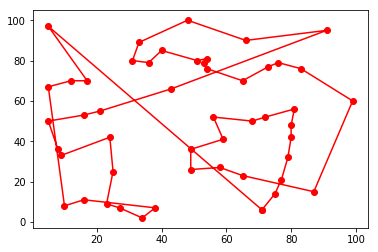

## Exercise 5: Local search
A common technique to improve the quality of a constructive algorithm is perform some improvements on a finalised solution.
In this exercise we will implement a function that checks every pair of cities in the solution and sees if the solution quality can be improved by swapping their position.

**Task:**
* Create a function called `local_search` that takes `tour` and `cities` as arguments.
* Inside the function, create a double loop as follows:
    ```python
    for i in range(n_cities):
        for j in range(n_cities):
    ```
* Calculate the length of the tour, and save it in the variable `current_length`
* In the `tour` variable, exchange the values in position `i` and `j`
* Check the quality of the new solution, and save it as `new_length`
* Compare `current_length` and `new_length`. If the solution has not improved, exchange back the `tour` values for `i` and `j`
* When your function is ready, remember to call it from the `main()` function!

**Tip:** Since we need to exchange the positions of elements in the tour function more than once, it might be handy to group this part of code in a function: `exchange_in_tour(tour, i, j)`

## Exercise 6: Improving the local search
In this exercise we will do a few changes to improve our local search from Exercise 5 both in quality and speed.
To appreciate the changes that we are making, go back to the `main` function and make sure you are calling `nearest_neighbour` with the argument `start_city=0`.

### 6a:
For the first modification, change the second loop as per the code below:
```python
        for i in range(n_cities - 1):
            for j in range(i + 1, n_cities):
```
And run your code **before** and **after** this change. What happens? Why? Is it better in this way?




### 6b:
Something we have overlooked in our previous function is that, once we make a swap of cities, it might be that other previous swaps now become interesting. The way to check them is to reset the search every time we find an improvement (i.e., make `i` and `j` be at the beginning of their loops again). 

Since we do not know in advance how many improvements we will find, we need to use a `while` loop, aided with a `bool` variable to keep track if there is any improvement.


**Task:**
Modify the local search function to reset the search every time that an improvement is found. The search should stop when there are no more improvements possible. To do this, follow these steps:

* Create a boolean variable at the beginning of the `local_search` function, and set it to True: `found_improvement = True`
* Start a `while` loop before the double `for` loop: `while found_improvement:`
* Inside the `while` and before the `for` loops, set `found_improvement` to `False`
* Make sure that, if there is an improvement, **both** `for` loops are interrupted and the variable `found_improvement` is set again to `True`. **Tip:** A `for` loop is interrupted with the statement `break`. This part of the code should now look like the following:
```python
        for i in range(n_cities):
            for j in range(i + 1, n_cities):
                
                # ... previous code...
                
                if new_length >= current_length:
                    exchange_in_tour(tour, i, j)
                else:
                    found_improvement = True
                    break
            if found_improvement:
                break
```
* Test your code! This should be a reasonable improvement:

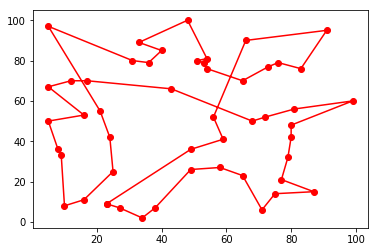

## Exercise 7: Debug challenge, OD Matrix

A common approach when tackling TSP-like problems is to pre-compute the distances between all cities and save them into a 2D array. Because in this matrix the rows are the origins and the columns the destinations, it is sometimes called OD matrix. Saving this information at the beginning of the code, might save some effort when computing local search.

**Task:**

You have been given the code for a function that calculates the OD matrix of a list of cities efficiently, it is as follows:
```python
def calculate_od_matrix(cities):
    n_cities = 4
    od_matrix = np.zeros((n_cities, n_cities))
    for i in range(n_cities):
        od_matrix[:,i] = (cities[:,0] - cities[i,0])**2 + (cities[:,1] - cities[i,1])**2
    
    return od_matrix
```

Include this function in your code (make sure the indentation stays right!) and run it, does it work?

**Tip:** It might help you to test this function using a smaller dataset. Try again with the file `square.csv` and compare the results to the results of `city_distance()` is it returning what is supposed to?

## Exercise 8: Importing a function

Our local search function from Exercise 5 recalculates the full cost of the tour each time it evaluates a change. This is a bit wasteful (and slow!) since exchanging two cities only changes the tour slightly.

We have provided you with a function that calculates this cost with less effort. It is on the file `city_exchange_cost.py`. 


**Task:** 
* Look at the code of this function so you are familiar with what it does. It returns the cost of performing an exchange of positions between cities `i` and `j` on a tour. If its result is positive, it means that the tour length will increase; if it is negative, the resulting tour will be shorter. But note that **it does not perform any changes to the tour!**

* Make sure the file `city_exchange_cost.py` is located in the same directory as your script.

* Import the new module in your script, so you can access the function later: 
```python
import city_exchange_cost as ct
```

* Go to your `main` function. Before calling any algorithm, you need to calculate the `od_matrix`. You can do so with this line:
```python
od_matrix = calculate_od_matrix(cities)
```

* Modify your `local_search` function (or create a new one called `faster_local_search`, if you wish to compare their performance later)

* This new function should have a new argument, `od_matrix`. This needs to be included in the function definition **and** in the place the function is called.

* Find the bit where the tour exchange performed and was evaluated, and the variables `current_length` and `new_length` were created.

* Get rid of that bit. Instead, call the new function and save its answer to a variable:
```python
solution_change = ct.city_exchange_cost(i, j, tour, cities, od_matrix)
```

* Now, focus on the `if` statement below:
```python
if new_length >= current_length:
    exchange_in_tour(tour, i, j)
else:
    found_improvement = True
    break
```

* This statement needs to be modified, the main changes should be:
    * The condition can no longer use `current_length` or `new_length`. Now you should check if `solution_change` is positive or negative.
    * Instead reversing the change when the change was not improving the quality, the code should perform the change if the tour length is shorter.
    
* Run your code again. The answers should be the same, but faster!

## Extra: (Exercise 9) How good can a solution be?

We have seen that the starting city had an impact on nearest neighbour. We want to find the best possible quality using the combination of nearest neighbour and local search, so we will create a new function that does both, trying all possible starting cities.

**Task:**

* Create a new function, called `best_nn_ls_solution`, that runs nearest neighbour with all possible starting cities, followed by local search. It should return the best tour. Use the (incomplete) template below to help you:

```python
def best_nn_ls_solution(cities, od_matrix):
    n_cities = cities.shape[0]
    best_tour = np.zeros(n_cities, dtype=int)
    best_tour_length = np.inf
    for starting_city in range(n_cities):
        # TODO: Call nearest neighbour and local search
        # TODO: Keep track of the best tour found so far
    return best_tour
```

* Replace the bits in the main function that call nearest neighbour and local search in the `main` function and call `best_nn_ls_solution` instead. What answer do you obtain? Is the quality better?

If everything has worked fine, for the `more_cities.csv` file you should get a tour length of 617.96 and the tour below:

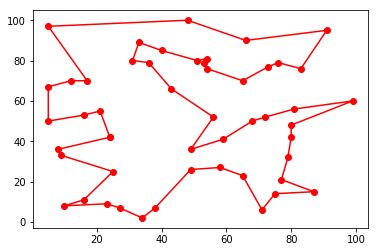